In [2]:
#import library
import numpy as np
import pandas as pd
import yfinance as yf #Stock Data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from transformers import pipeline
import finnhub #Company News
import torch

pd.set_option('display.max_colwidth',180)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-11-22 08:34:41.365146: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Companies top 500 

In [2]:
companies = pd.read_csv('/Users/natashaprabhoo/AI-ML-Studio/S&P_500_companies.csv')
companies.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999


## Stock Data

In [15]:
company_symbol = 'JPM'
stock_data = yf.download(company_symbol,start='2023-1-1',end=datetime.today())
stock_data = stock_data.reset_index()
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,135.240005,136.740005,133.889999,135.119995,128.148758,11054800
1,2023-01-04,135.990005,137.679993,135.570007,136.380005,129.343765,11687600
2,2023-01-05,135.660004,135.710007,133.699997,135.350006,129.315094,8381300
3,2023-01-06,136.130005,138.380005,134.490005,137.940002,131.789597,10029100
4,2023-01-09,138.600006,138.880005,136.880005,137.369995,131.245041,8482300


## Company News

In [16]:
finnhub_client = finnhub.Client(api_key="cnl0n1pr01qjvabn3kngcnl0n1pr01qjvabn3ko0")
news = pd.DataFrame(finnhub_client.company_news('ABNB', _from="2023-01-01", to='2024-01-01')).drop(columns=['id','image','category','url'])
news['datetime'] = pd.to_datetime(news['datetime'], unit='s').dt.strftime('%Y-%m-%d')
news['datetime'] = pd.to_datetime(news['datetime'])

news.head()

,datetime,headline,related,source,summary
0,2024-01-01,The Companies I Sold In 2023: Unveiling The Reasons Behind My Decision,ABNB,SeekingAlpha,"I focus on investing in the highest quality and growing businesses, while avoiding overpaying. Read about the positions I sold in 2023 and my goals for 2024."
1,2024-01-01,6 Top Long-Term Stocks On My 2024 Wishlist,ABNB,SeekingAlpha,"Discover six long-term investment ideas as the market soars in 2024, with some sectors presenting excellent value and potential for returns when they..."
2,2024-01-01,Is Airbnb (ABNB) Outperforming Other Computer and Technology Stocks This Year?,ABNB,Yahoo,"Here is how Airbnb, Inc. (ABNB) and DoorDash, Inc. (DASH) have performed compared to their sector so far this year."
3,2024-01-01,2023 Year In Review,ABNB,TalkMarkets,Looking for stock market analysis and research with proves results? Zacks.com offers in-depth financial research with over 30years of proven results.
4,2024-01-01,Selling goods online? Be warned: HMRC will soon know about it,ABNB,Yahoo,"Whatever it is, from used clothes on Vinted, collectables on eBay, to Airbnb lets, profits will now be under scrutiny"


In [35]:
news_df = pd.read_csv('/Users/natashaprabhoo/AI-ML-Studio/AAPL_news.csv')
#news_df = pd.read_csv('/Users/natashaprabhoo/AI-ML-Studio/JPMorgan_Chase_finnews.csv')
#AAPL_news_df.head(10)

print(news_df.info())
# print(AAPL_news_df.columns)
print(news_df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15492 entries, 0 to 15491
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  15492 non-null  object
 1   headline  15492 non-null  object
 2   related   15492 non-null  object
 3   source    15492 non-null  object
 4   summary   15383 non-null  object
 5   url       15492 non-null  object
dtypes: object(6)
memory usage: 726.3+ KB
None
(15492, 6)


In [37]:
# Ensure the 'datetime' column is in datetime format
news_df['datetime'] = pd.to_datetime(news_df['datetime'], errors='coerce')

# Check for rows where 'datetime' could not be converted
if news_df['datetime'].isna().any():
    print("Warning: Some dates in 'datetime' could not be parsed and were set to NaT.")

# Drop rows with NaT in the 'datetime' column
news_df = news_df.dropna(subset=['datetime'])

# Extract only the date part and store it in a new column
news_df['date'] = news_df['datetime'].dt.date

# Display the updated DataFrame structure and first few rows
print(news_df.head())


    datetime  \
0 2024-10-30   
1 2024-10-30   
2 2024-10-30   
3 2024-10-30   
4 2024-10-30   

                                                                         headline  \
0                         Qorvo earnings expose risks in global smartphone market   
1                                       Tech Flexes Earnings Power: A Closer Look   
2                                   Markets Give Back Gains As Hovering Continues   
3                    Nasdaq 100 & S&P 500 Elliott Wave Update - Wednesday, Oct 30   
4  Alphabet (GOOGL) Surpasses Earnings Expectations Amid Rising Election Concerns   

  related         source  \
0    AAPL  Seeking Alpha   
1    AAPL    TalkMarkets   
2    AAPL    TalkMarkets   
3    AAPL    TalkMarkets   
4    AAPL      GuruFocus   

                                                                                                                                                 summary  \
0  Looking for stock market analysis and research with proves resul

In [38]:
# Ensure the 'datetime' column is in datetime format
news_df['datetime'] = pd.to_datetime(news_df['datetime'], errors='coerce')

# Extract only the date part and store it in a new column
news_df['date'] = news_df['datetime'].dt.date

# Group by the 'date' column and count the number of articles published on each date
articles_per_date = news_df.groupby('date').size().reset_index(name='article_count')

# Display the first few rows of the result
print(articles_per_date.head())

         date  article_count
0  2023-03-22              1
1  2023-11-08             63
2  2023-11-09             45
3  2023-11-10             74
4  2023-11-11             20


In [39]:
import pandas as pd
from datetime import datetime, timedelta
from transformers import pipeline

def get_aapl_news(start_date='2023-03-07', end_date=datetime.today().date() - timedelta(days=1)):
    """
    Function to filter and analyze sentiment for AAPL-related financial news.

    Parameters:
    - start_date (str): Start date for filtering news (format: YYYY-MM-DD).
    - end_date (str): End date for filtering news (default: yesterday).

    Returns:
    - pd.DataFrame: A DataFrame containing news details with sentiment analysis results.
    """
    # Make a copy of the original DataFrame
    news = news_df.copy()

    # Convert the 'datetime' column to datetime format
    news['datetime'] = pd.to_datetime(news['datetime'], errors='coerce')

    # Filter articles within the specified date range
    news = news[(news['datetime'].dt.date >= pd.to_datetime(start_date).date()) & 
                (news['datetime'].dt.date <= pd.to_datetime(end_date).date())]

    # Sort news articles by datetime
    news = news.sort_values('datetime', ascending=True)

    # Load the sentiment analysis pipeline
    sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

    # Add sentiment analysis for each headline
    news['truncated_headline'] = news['headline'].apply(lambda x: truncate_sequence(x))
    news['headline_sentiment'] = news['truncated_headline'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
    news['headline_sentiment_score'] = news['truncated_headline'].apply(lambda x: sentiment_pipeline(x)[0]['score'])
    news['sentiment_binary'] = news['headline_sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

    # Select relevant columns for output
    return news[['datetime', 'source', 'headline', 'related', 'headline_sentiment', 'headline_sentiment_score', 'sentiment_binary']]

def truncate_sequence(text):
    """Truncate the text to 512 characters to fit the sentiment model's input size."""
    return text if len(text) <= 512 else text[:512]

# Call the function to get AAPL news
news_data = get_aapl_news()  # Replace start_date and end_date as needed
print(news_data.head())


        datetime        source  \
4787  2023-03-22         Yahoo   
15491 2023-11-08         Yahoo   
15456 2023-11-08      Benzinga   
15455 2023-11-08   MarketWatch   
15454 2023-11-08  SeekingAlpha   

                                                                                                                 headline  \
4787                                                                   Stock Market Today: Stock Market News And Analysis   
15491                                                               OLED iPad Pro display production to begin in February   
15456  Market Clubhouse Morning Memo - November 8th, 2023 (Trade Strategy For SPY, QQQ, AAPL, MSFT, NVDA, META, And TSLA)   
15455                                                    Goldman Sachs advises employees on plan to divest GM credit card   
15454                                          Warner Bros. Discovery Q3 Earnings Show Progress, But It's Still Not A Buy   

      headline_sentiment  headline_sentiment

In [40]:

# Group by date and calculate the average sentiment score
average_sentiment_per_date = (
    news_data.groupby(news_data['datetime'].dt.date)['headline_sentiment_score']
    .mean()
    .reset_index()
)

# Rename the columns for clarity
average_sentiment_per_date.columns = ['date', 'average_sentiment']

# Display the first few rows
print(average_sentiment_per_date.head())


         date  average_sentiment
0  2023-03-22           0.979189
1  2023-11-08           0.927940
2  2023-11-09           0.924651
3  2023-11-10           0.938030
4  2023-11-11           0.966373


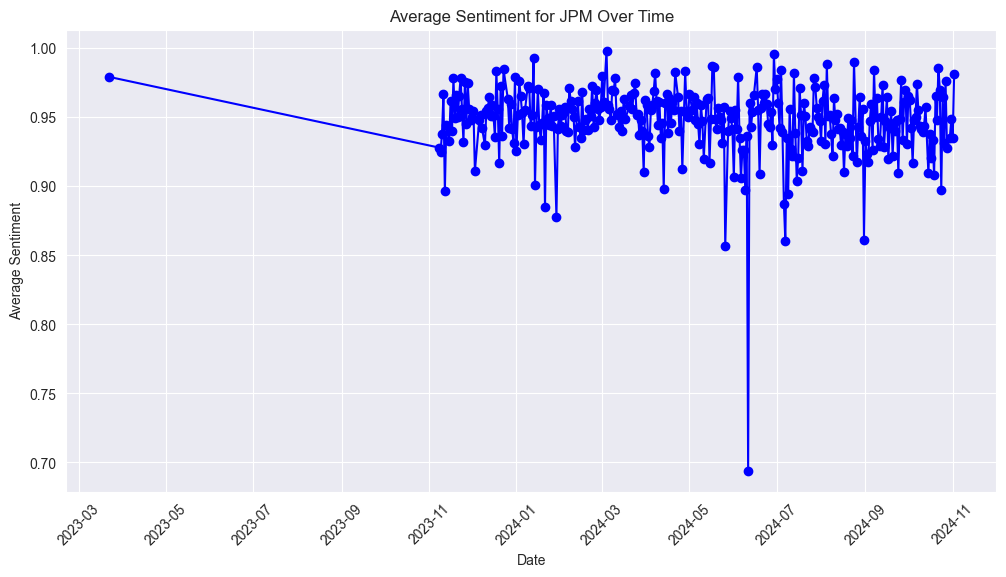

In [41]:
# Plot average sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_date['date'], average_sentiment_per_date['average_sentiment'], marker='o', linestyle='-', color='b')
plt.title(f'Average Sentiment for {company_symbol} Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [42]:
# Assuming average_sentiment_per_date, articles_per_date, and stock_data are preloaded DataFrames

# Ensure the 'date' columns are in datetime format
average_sentiment_per_date['date'] = pd.to_datetime(average_sentiment_per_date['date'])
articles_per_date['date'] = pd.to_datetime(articles_per_date['date'])
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Merge the average sentiment and articles per date dataframes on the 'date' column
merged_df = pd.merge(average_sentiment_per_date, articles_per_date, on='date', how='inner')
merged_df = pd.merge(merged_df, stock_data[['Date', 'Close']], left_on='date', right_on='Date', how='inner')

# Cleaning up the merged dataframe
merged_df = merged_df.drop(columns=['Date'])
merged_df = merged_df.rename(columns={'Close': 'stock_close'})

# Calculate the stock market movement (difference in closing price compared to the previous day)
merged_df = merged_df.sort_values('date')  
merged_df['stock_movement'] = merged_df['stock_close'].diff()

print(merged_df.head())


        date  average_sentiment  article_count  stock_close  stock_movement
0 2023-03-22           0.979189              1   127.180000             NaN
1 2023-11-08           0.927940             63   144.720001       17.540001
2 2023-11-09           0.924651             45   144.289993       -0.430008
3 2023-11-10           0.938030             74   146.429993        2.139999
4 2023-11-13           0.944179             57   145.779999       -0.649994


In [48]:
# Cleaning data and removing outliers
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    """
    Removes outliers from a DataFrame based on the IQR method.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column (str): The column to check for outliers.

    Returns:
    - pd.DataFrame: DataFrame with outliers removed.
    """
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to include only rows within bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example: Removing outliers from the stock_close column
merged_df = remove_outliers_iqr(merged_df, 'stock_close')
print("Data after removing outliers:")
print(merged_df.describe())


Data after removing outliers:
                                date  average_sentiment  article_count  \
count                            238         238.000000     238.000000   
mean   2024-05-07 19:33:46.890756352           0.946929      57.180672   
min              2023-03-22 00:00:00           0.694071       1.000000   
25%              2024-02-08 06:00:00           0.938546      42.000000   
50%              2024-05-11 12:00:00           0.948593      57.000000   
75%              2024-08-06 18:00:00           0.958667      70.750000   
max              2024-11-01 00:00:00           0.998098     130.000000   
std                              NaN           0.024148      22.334741   

       stock_close  stock_movement  lag_1_close  lag_1_sentiment  
count   238.000000      237.000000   238.000000       238.000000  
mean    192.620042        0.404051   192.492109         0.946981  
min     127.180000      -12.639999   127.180000         0.694071  
25%     175.182503       -0.720001 

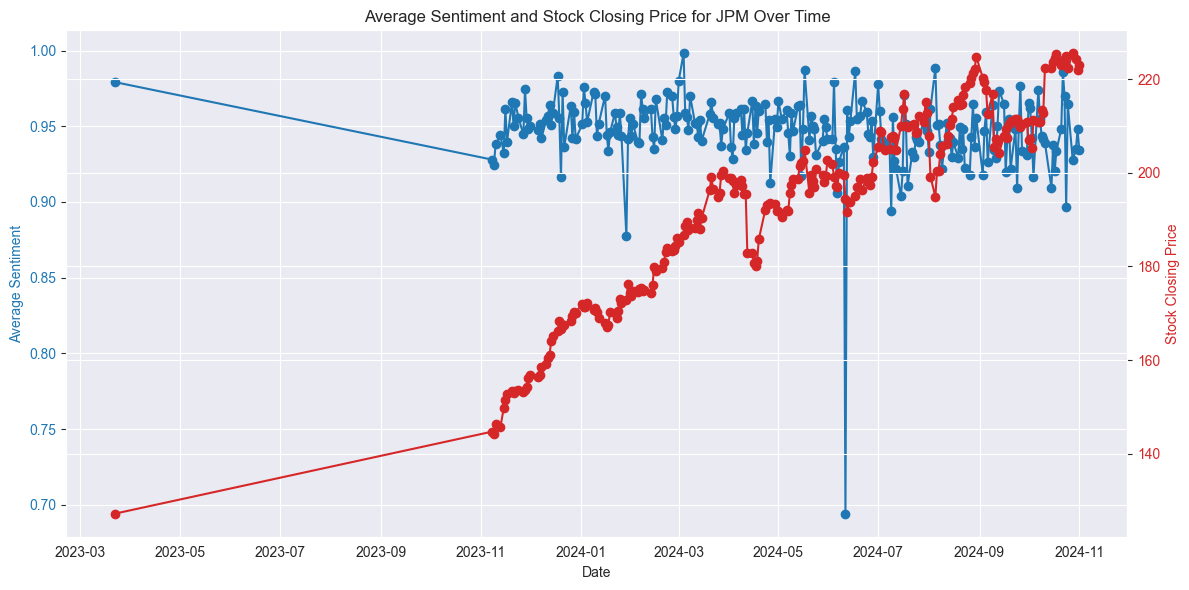

In [49]:
# Plot average sentiment and stock closing price over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average sentiment
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Sentiment', color='tab:blue')
ax1.plot(merged_df['date'], merged_df['average_sentiment'], marker='o', linestyle='-', color='tab:blue', label='Average Sentiment')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot the stock closing price
ax2 = ax1.twinx()
ax2.set_ylabel('Stock Closing Price', color='tab:red')
ax2.plot(merged_df['date'], merged_df['stock_close'], marker='o', linestyle='-', color='tab:red', label='Stock Closing Price')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and grid
plt.title(f'Average Sentiment and Stock Closing Price for {company_symbol} Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()

Linear Regression Model

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare lag features
merged_df['lag_1_close'] = merged_df['stock_close'].shift(1)
merged_df['lag_1_sentiment'] = merged_df['average_sentiment'].shift(1)

# Fill NaN values (alternative to dropping)
merged_df['lag_1_close'] = merged_df['lag_1_close'].fillna(merged_df['lag_1_close'].mean())
merged_df['lag_1_sentiment'] = merged_df['lag_1_sentiment'].fillna(merged_df['lag_1_sentiment'].mean())

# Features (X) and Target (y)
X = merged_df[['lag_1_close', 'lag_1_sentiment']]
y = merged_df['stock_close']

# Check the dataset size
if len(merged_df) < 10:
    raise ValueError("Dataset is too small. Add more historical data.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 5.877246999687702
R-squared: 0.9858564132151972
Coefficients: [0.97460909 7.03125119]
Intercept: -1.6545170876598831


In [63]:
import pandas as pd
from datetime import datetime, timedelta

# Ensure the model and merged_df are already prepared
# The last known values of `stock_close` and `average_sentiment`
latest_close = merged_df['stock_close'].iloc[-1]  # Last closing price
latest_sentiment = merged_df['average_sentiment'].iloc[-1]  # Last sentiment score
# current_datetime = datetime.now()  # Current datetime
current_datetime = datetime(2024, 11, 15)

# DataFrame to store predictions
future_predictions = pd.DataFrame(columns=['day', 'datetime', 'predicted_stock_close', 'predicted_movement', 'movement_direction'])

# Predict for the next 5 days
for day in range(1, 6):  # Predict for 5 days

    # Create a single-row DataFrame for prediction
    future_data = pd.DataFrame({
        'lag_1_close': [latest_close],
        'lag_1_sentiment': [latest_sentiment]
    })

    # Predict the next day's closing price
    next_close = model.predict(future_data)[0]

    # Calculate stock movement
    movement = next_close - latest_close
    movement_direction = "Up" if movement > 0 else "Down" if movement < 0 else "No Change"

    # Calculate datetime for the prediction
    prediction_datetime = current_datetime + timedelta(days=day)

    # Store the prediction
    future_predictions = pd.concat(
        [future_predictions, pd.DataFrame({
            'day': [day],
            'datetime': [prediction_datetime],
            'predicted_stock_close': [next_close],
            'predicted_movement': [movement],
            'movement_direction': [movement_direction]
        })],
        ignore_index=True
    )

    # Update `latest_close` and `latest_sentiment` for the next prediction
    latest_close = next_close
    latest_sentiment = latest_sentiment  # Adjust if you have predicted sentiments

# Display the predictions
print("Predicted Closing Prices and Movements for the Next 5 Days:")
print(future_predictions)


Predicted Closing Prices and Movements for the Next 5 Days:
  day   datetime  predicted_stock_close  predicted_movement movement_direction
0   1 2024-11-16             222.196509           -0.743494               Down
1   2 2024-11-17             221.471893           -0.724616               Down
2   3 2024-11-18             220.765676           -0.706217               Down
3   4 2024-11-19             220.077390           -0.688286               Down
4   5 2024-11-20             219.406581           -0.670809               Down


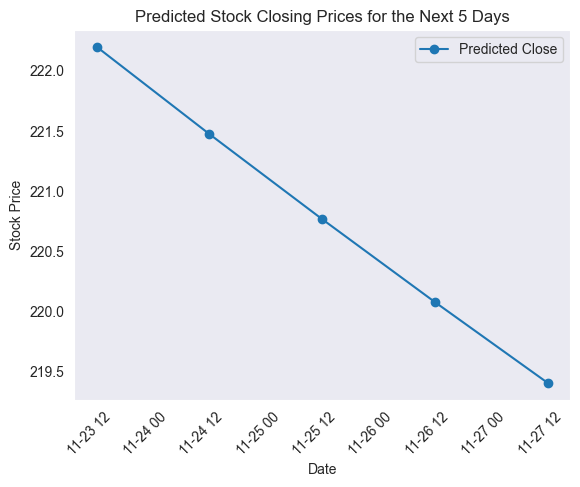

In [60]:
import matplotlib.pyplot as plt

plt.plot(future_predictions['datetime'], future_predictions['predicted_stock_close'], marker='o', label="Predicted Close")
plt.title("Predicted Stock Closing Prices for the Next 5 Days")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.show()
